In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel('./data/data_AI_and_Human_generated_texts.xlsx', sheet_name='AI_and_Human_generated_texts')
true_responses = ['No', 'Yes', 'Yes', 'No', 'Yes', 'No']
considered_variables = ['Age', 'Study Field', 'Study Level']
reasons = ['Grammar', 'Spelling', 'Outdated Information', 'Inconsistent statements', 'Consistent statements', 'Repetitive', 
           'Lack of emotions', 'Emotions', 'Formal tone', 'Creativity', 'Personal', 'Other']

In [22]:
def get_classification_rate(group):
    number_of_correct_classification = 0
    for index, row in group.iterrows():
        for i in range(6):
            if row['Is the following text AI generated? ({})'.format(i+1)] == true_responses[i]:
                number_of_correct_classification+=1
    return number_of_correct_classification / (group.shape[0]*6)
        

In [23]:
## Classification rates and  number of complete responses based on the age, study field and study level
stats = {'Age': [],
         'Study Field': [],
         'Study Level': []}
reasons_stats = {
    'Grammar': 0,
    'Spelling': 0,
    'Outdated Information': 0,
    'Inconsistent statements': 0,
    'Consistent statements': 0,
    'Repetitive': 0,
    'Lack of emotions': 0,
    'Emotions': 0,
    'Formal tone': 0,
    'Creativity': 0,
    'Personal': 0,
    'Other': 0
}

for considered_criteria in considered_variables:
    print('**********************************************************')
    print('Rates based on : {}'.format(considered_criteria))
    for value in df[considered_criteria].unique():
        group = df[df[considered_criteria] == value]
        number_of_samples = group.shape[0]
        stats[considered_criteria].append((value, get_classification_rate(group), number_of_samples))
        print(value, get_classification_rate(group), number_of_samples)
    print('**********************************************************\n')


print('**********************************************************\n')
print('Rates and number for each considered Variable')
for considered_criteria in considered_variables:
    print('**********************************************************')
    print(considered_criteria)
    print(stats[considered_criteria])
    print('**********************************************************\n')


print('**********************************************************\n')
print('**********************************************************\n')
print('classification rate everithing included: {}'.format(get_classification_rate(df)))

print('**********************************************************\n')
print('**********************************************************\n')
print('Classification reasons: \n')
for i in [1,2,3,4,5,6]:
    for reason in reasons:
        reasons_stats[reason] += df[df['Reasons ({}): {}'.format(i, reason)] == 'Checked'].shape[0]

print(reasons_stats)
print('**********************************************************\n')
print('**********************************************************\n')


reasons_stats_as_list = list(reasons_stats.items())
print(reasons_stats_as_list)

**********************************************************
Rates based on : Age
16 - 20 0.5370370370370371 9
21 - 25 0.6291666666666667 40
26 - 30 0.5416666666666666 16
31 - 35 0.4444444444444444 3
36 - 40 0.5555555555555556 3
76 - 80 0.5 1
**********************************************************

**********************************************************
Rates based on : Study Field
IT(Business Informatics, System Engineering, Media Informatics, Computer Science) 0.5942028985507246 69
Language and Literature Science 0.3888888888888889 3
**********************************************************

**********************************************************
Rates based on : Study Level
Bachelor 0.6190476190476191 42
Master 0.5402298850574713 29
Professor 0.5 1
**********************************************************

**********************************************************

Rates and number for each considered Variable
**********************************************************
Age
[

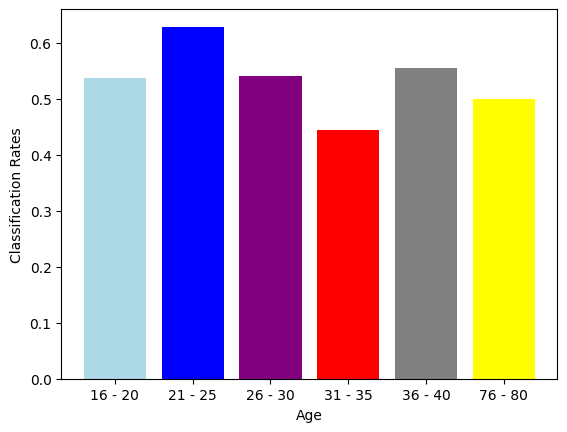

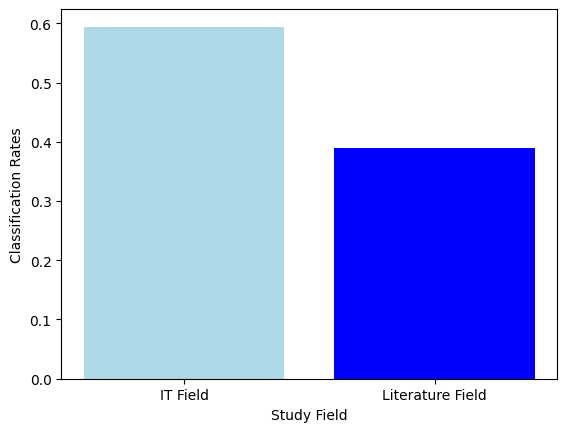

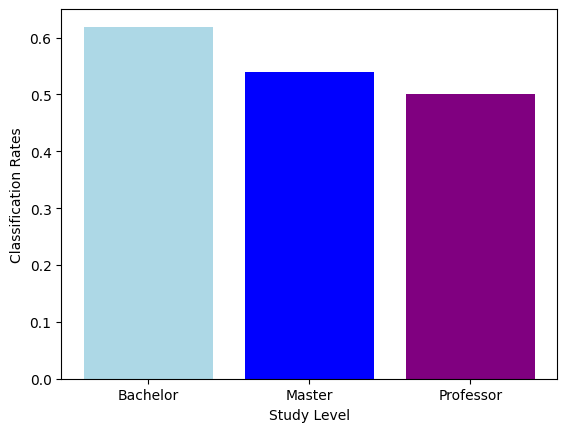

In [25]:
for considered_criteria in considered_variables:
    color = ['lightblue', 'blue', 'purple', 'red', 'gray', 'yellow']
    x = [a[0] for a in stats[considered_criteria]]
    y = [a[1] for a in stats[considered_criteria]]
    if considered_criteria == 'Study Field':
        x = ['IT Field', 'Literature Field']
    plt.bar(x,y, color=color)
    plt.xlabel(considered_criteria)
    plt.ylabel('Classification Rates')
    plt.show()

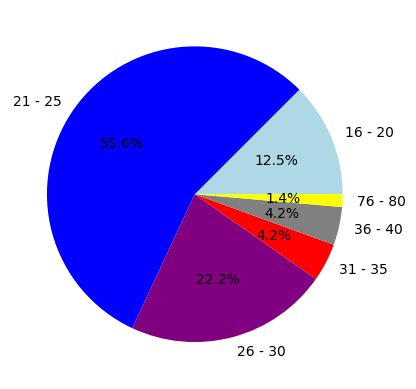

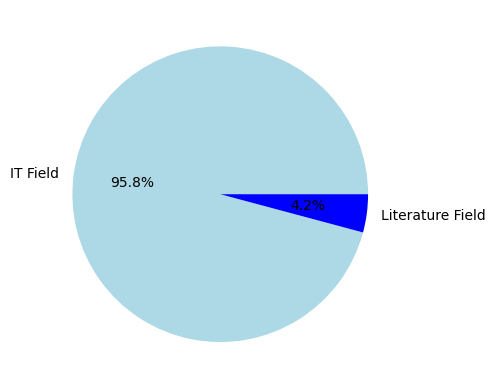

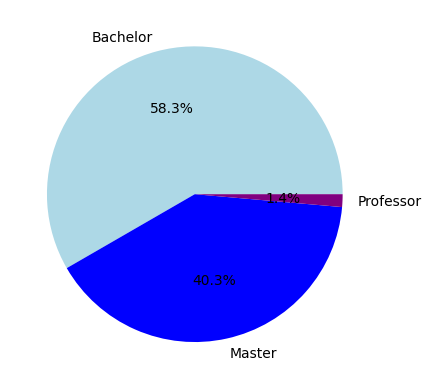

In [26]:
# Pourcentage of each group
for considered_criteria in considered_variables:
    color = ['lightblue', 'blue', 'purple', 'red', 'gray', 'yellow']
    xlabl = []
    x = [a[0] for a in stats[considered_criteria]]
    y = [a[2] for a in stats[considered_criteria]]
    if considered_criteria == 'Study Field':
        x = ['IT Field', 'Literature Field']
    # plt.bar(x,y)
    # plt.xlabel(considered_criteria)
    # plt.ylabel('Number of complete responses')

    fig, ax = plt.subplots()
    ax.pie(y, labels=x, autopct='%1.1f%%', colors = color)
    #plt.show()

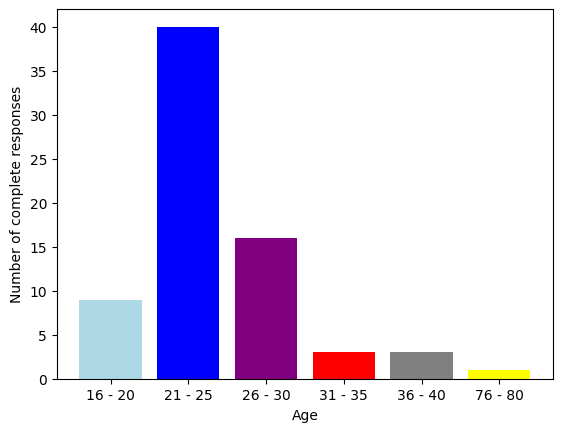

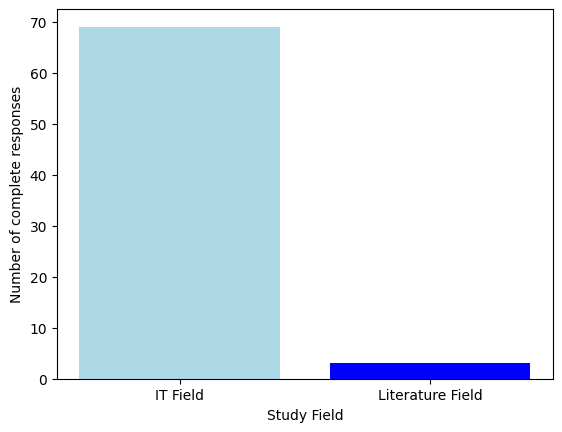

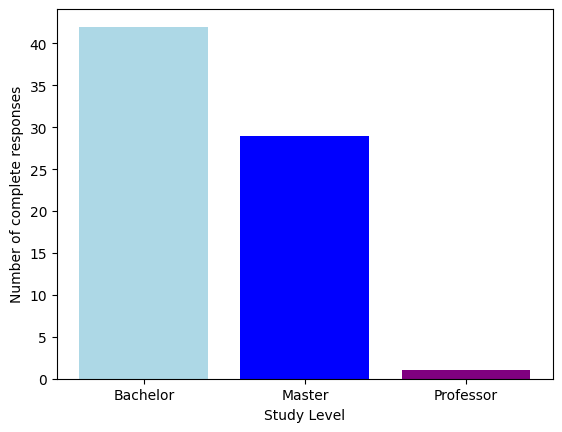

In [28]:
# number of participacion of each group
for considered_criteria in considered_variables:
    color = ['lightblue', 'blue', 'purple', 'red', 'gray', 'yellow']
    xlabl = []
    x = [a[0] for a in stats[considered_criteria]]
    y = [a[2] for a in stats[considered_criteria]]
    if considered_criteria == 'Study Field':
        x = ['IT Field', 'Literature Field']
    plt.bar(x,y, color = color)
    plt.xlabel(considered_criteria)
    plt.ylabel('Number of complete responses')
    plt.show()

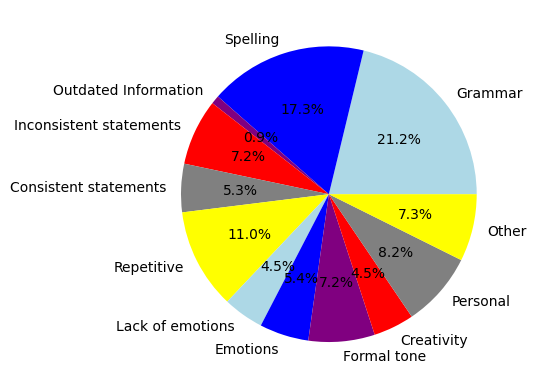

In [29]:
# most used reasons of classification
color = ['lightblue', 'blue', 'purple', 'red', 'gray', 'yellow']
x = [a[0] for a in reasons_stats_as_list]
y = [a[1] for a in reasons_stats_as_list]
# plt.bar(x,y, color=color)
# plt.xlabel('Reasons of Classification')
# plt.ylabel('Frequency of Reasons of Classification')

fig, ax = plt.subplots()
ax.pie(y, labels=x, autopct='%1.1f%%', colors = color)
plt.show()